# Pandas - Introduction

This notebook explans how to use the `pandas` library for analysis of tabular data.

In [1]:
# Start using pandas (default import convention)
import pandas as pd
import numpy as np

In [2]:
# Let pandas speak for themselves
print(pd.__doc__)


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

Visit the official website for a nicely written documentation: https://pandas.pydata.org

In [3]:
# Current version (should be 1.5+ in 2023)
print(pd.__version__)

2.2.3


## Basic objects 

The **pandas** library has a vast API with many useful functions. However, most of this revolves
around two important classes:

* Series
* DataFrame

In this introduction, we will focus on them - what each of them does and how they relate to each other
and numpy objects.

### Series

Series is a one-dimensional data structure, central to pandas. 

For a complete API, visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [4]:
# My first series
series = pd.Series([11, 12, 13])
series

0    11
1    12
2    13
dtype: int64

This looks a bit like a Numpy array, does it not?

Actually, in most cases the Series wraps a Numpy array...

In [5]:
series.values  # The result is a Numpy array

array([11, 12, 13])

But there is something more. Alongside the values, we see that each item (or "row") has a certain label. The collection of labels is called **index**.

In [6]:
series.index

RangeIndex(start=0, stop=3, step=1)

This index (see below) can be used, as its name suggests, to index items of the series.

In [7]:
# Return an element from the series
series.loc[1]

np.int64(12)

In [8]:
# Or
series[1]

np.int64(12)

In [9]:
# Construction from a dictionary
series_ab = pd.Series({"a": 2, "b": 4})
series_ab

a    2
b    4
dtype: int64

In [10]:
series_ab.loc["a"]

np.int64(2)

**Exercise**: Create a series with 5 elements.

In [11]:
result = ...

### DataFrame

A **DataFrame** is pandas' answer to Excel sheets - it is a collection of named columns (or, in our case, a collection of **Series**).
Quite often, we directly read data frames from an external source, but it is possible to create them from:
* a dict of Series, numpy arrays or other array-like objects
* from an iterable of rows (where rows are Series, lists, dictionaries, ...)

In [12]:
# List of lists (no column names)
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(table)
table_df

0  1
0  a  1
1  b  3
2  c  5

In [13]:
# Dict of Series (with column names)
df = pd.DataFrame({
    'number': pd.Series([1, 2, 3, 4], dtype=np.int8),
    'letter': pd.Series(['a', 'b', 'c', 'd'])
})
df

number letter
0       1      a
1       2      b
2       3      c
3       4      d

In [14]:
# Numpy array (10x2), specify column names
data = np.random.normal(0, 1, (10, 2))

df = pd.DataFrame(data, columns=['a', 'b'])
df

a         b
0  0.843596 -0.225515
1  0.396342 -0.043576
2  1.513448  0.429237
3  1.258619  1.615504
4 -1.446411 -1.235733
5 -0.940662  0.084430
6 -1.524685  0.044395
7  1.380301  0.401740
8  0.176756  2.011123
9 -1.386348 -0.736067

In [15]:
# A DataFrame also has an index.
df.index

RangeIndex(start=0, stop=10, step=1)

In [16]:
# ...that is shared by all columns
df.index is df["a"].index

True

In [17]:
# The columns also form an index.
df.columns

Index(['a', 'b'], dtype='object')

**Exercise:** Create `DataFrame` whose `x`-column is $0, \frac{1}{4}\pi, \frac{1}{2}\pi, .. 2\pi $, `y` column is `cos(x)` and index are `fractions` `0, 1/4, 1/2 ... 2`

In [18]:
import fractions

index = [fractions.Fraction(n, ___) for n in range(___)]
x = np.___([___ for ___ in ___])
y = ___

df = pd.DataFrame(___, index = ___)

# display
df

TypeError: 'RangeIndex' object cannot be interpreted as an integer

## D(ata) types

Pandas builds upon the numpy data types (mentioned earlier) and adds a couple of more.

In [19]:
typed_df = pd.DataFrame({
  "bool": np.arange(5) % 2 == 0,
  "int": range(5),
  "int[nan]": pd.Series([np.nan, 0, 1, 2, 3], dtype="Int64"),
  "float": np.arange(5) * 3.14,
  "complex": np.array([1 + 2j, 2 + 3j, 3 + 4j, 4 + 5j, 5 + 6j]),
  "object": [None, 1, "2", [3, 4], 5 + 6j],
  "string?": ["a", "b", "c", "d", "e"],
  "string!": pd.Series(["a", "b", "c", "d", "e"], dtype="string"),
  "datetime": pd.date_range('2018-01-01', periods=5, freq='3M'),
  "timedelta": pd.timedelta_range(0, freq="1s", periods=5),
  "category": pd.Series(["animal", "plant", "animal", "animal", "plant"], dtype="category"),
  "period": pd.period_range('2018-01-01', periods=5, freq='M'),
})
typed_df

/var/folders/dm/gbbql3p121z0tr22r2z98vy00000gn/T/ipykernel_95281/1417085050.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "datetime": pd.date_range('2018-01-01', periods=5, freq='3M'),


bool  int  int[nan]  float   complex  object string? string!   datetime  \
0   True    0      <NA>   0.00  1.0+2.0j    None       a       a 2018-01-31   
1  False    1         0   3.14  2.0+3.0j       1       b       b 2018-04-30   
2   True    2         1   6.28  3.0+4.0j       2       c       c 2018-07-31   
3  False    3         2   9.42  4.0+5.0j  [3, 4]       d       d 2018-10-31   
4   True    4         3  12.56  5.0+6.0j  (5+6j)       e       e 2019-01-31   

        timedelta category   period  
0 0 days 00:00:00   animal  2018-01  
1 0 days 00:00:01    plant  2018-02  
2 0 days 00:00:02   animal  2018-03  
3 0 days 00:00:03   animal  2018-04  
4 0 days 00:00:04    plant  2018-05

In [20]:
typed_df.dtypes

bool                    bool
int                    int64
int[nan]               Int64
float                float64
complex           complex128
object                object
string?               object
string!       string[python]
datetime      datetime64[ns]
timedelta    timedelta64[ns]
category            category
period             period[M]
dtype: object

We will see some of the types practically used in further analysis.

## Indices & indexing



In [21]:
abc_series = pd.Series(range(3), index=["a", "b", "c"])
abc_series

a    0
b    1
c    2
dtype: int64

In [22]:
abc_series.index

Index(['a', 'b', 'c'], dtype='object')

In [23]:
abc_series.index = ["c", "d", "e"]  # Changes the labels in-place!
abc_series.index.name = "letter"
abc_series

letter
c    0
d    1
e    2
dtype: int64

In [24]:
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(
    table,
    index=["first", "second", "third"],
    columns=["alpha", "beta"]
)
table_df

alpha  beta
first      a     1
second     b     3
third      c     5

In [25]:
alpha = table_df["alpha"]  # Simple [] indexing in DataFrame returns Series
alpha

first     a
second    b
third     c
Name: alpha, dtype: object

In [26]:
alpha.loc["second"]             # Simple [] indexing in Series returns scalar values.

'b'

A slice with a `["list", "of", "columns"]` yields a `DataFrame` with those columns. 

For example:

In [27]:
table_df[["beta", "alpha"]]

beta alpha
first      1     a
second     3     b
third      5     c

`[["column_name"]]` returs a `DataFrame` as well, not `Series`:

In [28]:
table_df[["alpha"]]

alpha
first      a
second     b
third      c

There are two ways how to properly index rows & cells in the DataFrame:

- `loc` for label-based indexing
- `iloc` for order-based indexing (it does not use the **index** at all)

Note the square brackets. The mentioned attributes actually are not methods
but special "indexer" objects. They accept one or two arguments specifying
the position along one or both axes.

### `loc`


In [29]:
first = table_df.loc["first"]
first

alpha    a
beta     1
Name: first, dtype: object

In [30]:
table_df.loc["first", "beta"]

np.int64(1)

In [31]:
table_df.loc["first":"second", "beta"]   # Use ranges (inclusive)

first     1
second    3
Name: beta, dtype: int64

### `iloc`


In [32]:
table_df.iloc[1]

alpha    b
beta     3
Name: second, dtype: object

In [33]:
table_df.iloc[0:4:2]   # Select every second row

alpha  beta
first     a     1
third     c     5

In [34]:
table_df.at["first", "beta"]

np.int64(1)

In [35]:
type(table_df.at)

pandas.core.indexing._AtIndexer

## Modifying DataFrames

Adding a new column is like adding a key/value pair to a dict.
Note that this operation, unlike most others, does modify the DataFrame.

In [43]:
table_df

alpha  beta  delta
first      a     1   True
second     b     3  False
third      c     5   True

In [49]:
from datetime import datetime
table_df["now"] = datetime.now()
table_df

alpha  beta  delta                        now
first      a     1   True 2025-01-19 13:39:07.545270
second     b     3  False 2025-01-19 13:39:07.545270
third      c     5   True 2025-01-19 13:39:07.545270

Non-destructive version that returns a new DataFrame, uses the `assign` method:

In [50]:
table_df.assign(delta = [True, False, True]).drop(columns=["now"])

alpha  beta  delta
first      a     1   True
second     b     3  False
third      c     5   True

In [51]:
# However, the original DataFrame is not changed
table_df

alpha  beta  delta                        now
first      a     1   True 2025-01-19 13:39:07.545270
second     b     3  False 2025-01-19 13:39:07.545270
third      c     5   True 2025-01-19 13:39:07.545270

Deleting a column is very easy too.

In [52]:
del table_df["now"]
table_df

alpha  beta  delta
first      a     1   True
second     b     3  False
third      c     5   True

The **drop** method works with both rows and columns (creating a new data frame), returning a new object.

In [53]:
table_df.drop("beta", axis=1)

alpha  delta
first      a   True
second     b  False
third      c   True

In [54]:
table_df.drop("second", axis=0)

alpha  beta  delta
first     a     1   True
third     c     5   True

**Exercise:** Use a combination of `reset_index`, `drop` and `set_index` to transform `table_df` into `pd.DataFrame({'index': table_df.index}, index=table_df["alpha"])`

In [ ]:
results = table_df.___.___.___

# display
result

**Let's get some real data!**

## I/O in pandas

Pandas can read (and write to) a huge variety of file formats. More details can be found in the official documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Most of the functions for reading data are named `pandas.read_XXX`, where XXX is the format used. We will look at three commonly used ones.

In [55]:
# List functions for input in pandas.

print("\n".join(method for method in dir(pd) if method.startswith("read_")))

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table
read_xml


### Read CSV

Nowadays, a lot of data comes in the textual Comma-separated values format (CSV).
Although not properly standardized, it is the de-facto standard for files that are not
huge and are meant to be read by human eyes too.

Let's read the population of U.S. states that we will need later:

In [56]:
territories = pd.read_csv("data/us_state_population.csv")
territories.head(9)

Territory  Population  Population 2010 Code
0      California  39029342.0         37253956   CA
1           Texas  30029572.0         25145561   TX
2         Florida  22244823.0         18801310   FL
3        New York  19677151.0         19378102   NY
4    Pennsylvania  12972008.0         12702379   PA
5        Illinois  12582032.0         12830632   IL
6            Ohio  11756058.0         11536504   OH
7         Georgia  10912876.0          9687653   GA
8  North Carolina  10698973.0          9535483   NC

The automatic data type parsing converts columns to appropriate types:

In [57]:
territories.dtypes

Territory           object
Population         float64
Population 2010      int64
Code                object
dtype: object

Sometimes the CSV input does not work out of the box. Although pandas automatically understands and reads zipped files,
it usually does not automatically infer the file format and its variations - for details, see the `read_csv` documentation here: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [58]:
pd.read_csv('data/iris.tsv.gz')

Sepal length\tSepal width\tPetal length\tPetal width\tSpecies
0                      5.1\t3.5\t1.4\t0.2\tI. setosa           
1                      4.9\t3.0\t1.4\t0.2\tI. setosa           
2                      4.7\t3.2\t1.3\t0.2\tI. setosa           
3                      4.6\t3.1\t1.5\t0.2\tI. setosa           
4                      5.0\t3.6\t1.4\t0.2\tI. setosa

...in this case, the CSV file does not use commas to separate values. Therefore, we need to specify an extra argument:

In [59]:
pd.read_csv("data/iris.tsv.gz", sep='\t')

Sepal length  Sepal width  Petal length  Petal width    Species
0           5.1          3.5           1.4          0.2  I. setosa
1           4.9          3.0           1.4          0.2  I. setosa
2           4.7          3.2           1.3          0.2  I. setosa
3           4.6          3.1           1.5          0.2  I. setosa
4           5.0          3.6           1.4          0.2  I. setosa

See the difference?

### Read Excel

Let's read the list of U.S. incidents when lasers interfered with airplanes.

In [61]:
pd.read_excel("data/laser_incidents_2019.xlsx")

Incident Date  Incident Time Flight ID Aircraft Altitude Airport  \
0       2019-01-01             35      N3EG     C421     2500     SAT   
1       2019-01-01             43   RPA3469     E75S     4000     IAH   
2       2019-01-01             44   UAL1607     A319     4000     IAH   
3       2019-01-01            110    N205TM     BE20     2500     HDC   
4       2019-01-01            115   JIA5233     CRJ9     2000     JAX   
...            ...            ...       ...      ...      ...     ...   
6131    2019-12-31            845   ASH5861     CRJ9     3000     JAN   
6132    2019-12-31            929      N22P     CRUZ     2500     HNL   
6133    2019-12-31           2310    GTH530     GLF4      500     SJU   
6134    2019-12-31           2312   AMF6916      SW4      600     SJU   
6135    2019-12-31           2327    N715TH     C172     3000     CHO   

     Laser Color Injury              City        State  
0          Green     No       San Antonio        Texas  
1          Green     No           Houston        Texas  
2          Green     No           Houston        Texas  
3          Green     No           Hammond    Louisiana  
4          Green     No      Jacksonville      Florida  
...          ...    ...               ...          ...  
6131       Green     No          Jackson   Mississippi  
6132       Green     No          Honolulu       Hawaii  
6133       White     No          Carolina  Puerto Rico  
6134       Green     No          Carolina  Puerto Rico  
6135       Green     No  Charlottesville      Virginia  

[6136 rows x 10 columns]

Note: This reads just the first sheet from the file. If you want to extract more sheets, you will need to use the `pandas.'ExcelFile` class. See the [relevant part](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#reading-excel-files) of the documentation.

### Read HTML (Optional)

Pandas is able to scrape data from tables embedded in web pages using the `read_html` function.
This might or might not bring you good results and probably you will have to tweak your
data frame manually. But it is a good starting point - much better than being forced to parse
the HTML ourselves!

In [63]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_laser_types")
type(tables), len(tables)

(list, 9)

In [64]:
tables[1]

Laser gain medium and type  \
0          Helium–neon laser   
1                Argon laser   
2              Krypton laser   
3            Xenon ion laser   
4             Nitrogen laser   
5       Carbon dioxide laser   
6      Carbon monoxide laser   
7              Excimer laser   

                             Operation wavelength(s)  \
0  632.8 nm (543.5 nm, 593.9 nm, 611.8 nm, 1.1523...   
1  454.6 nm, 488.0 nm, 514.5 nm (351 nm, 363.8, 4...   
2  416 nm, 530.9 nm, 568.2 nm, 647.1 nm, 676.4 nm...   
3  Many lines throughout visible spectrum extendi...   
4                                           337.1 nm   
5                                  10.6 μm, (9.4 μm)   
6                         2.6 to 4 μm, 4.8 to 8.3 μm   
7  157 nm (F2), 193.3 nm (ArF), 248 nm (KrF), 308...   

                                         Pump source  \
0                               Electrical discharge   
1                               Electrical discharge   
2                               Electrical discharge   
3                               Electrical discharge   
4                               Electrical discharge   
5  Transverse (high-power) or longitudinal (low-p...   
6                               Electrical discharge   
7     Excimer recombination via electrical discharge   

                              Applications and notes  
0  Interferometry, holography, spectroscopy, barc...  
1  Retinal phototherapy (for diabetes), lithograp...  
2  Scientific research, mixed with argon to creat...  
3                               Scientific research.  
4  Pumping of dye lasers, measuring air pollution...  
5  Material processing (laser cutting, laser beam...  
6  Material processing (engraving, welding, etc.)...  
7  Ultraviolet lithography for semiconductor manu...

In [65]:
tables[2]

Laser gain medium and type  \
0              Hydrogen fluoride laser   
1             Deuterium fluoride laser   
2  COIL (chemical oxygen–iodine laser)   
3    Agil (All gas-phase iodine laser)   

                             Operation wavelength(s)  \
0  2.7 to 2.9 μm for hydrogen fluoride (<80% atmo...   
1  ~3800 nm (3.6 to 4.2 μm) (~90% atm. transmitta...   
2          1.315 μm (<70% atmospheric transmittance)   
3          1.315 μm (<70% atmospheric transmittance)   

                                         Pump source  \
0  Chemical reaction in a burning jet of ethylene...   
1                                  chemical reaction   
2  Chemical reaction in a jet of singlet delta ox...   
3  Chemical reaction of chlorine atoms with gaseo...   

                              Applications and notes  
0  Used in research for laser weaponry, operated ...  
1                      US military laser prototypes.  
2  Military lasers, scientific and materials rese...  
3                   Scientific, weaponry, aerospace.

### Write CSV

Pandas is able to write to many various formats but the usage is similar. 

In [66]:
tables[1].to_csv("gas_lasers.csv", index=False)

## Data analysis (very basics)

Let's extend the data of laser incidents to a broader time range and read the data from a summary CSV file:

In [67]:
laser_incidents_raw = pd.read_csv("data/laser_incidents_2015-2020.csv")

Let's see what we have here...

In [68]:
laser_incidents_raw.head()

Unnamed: 0 Incident Date  Incident Time Flight ID Aircraft  Altitude  \
0           0    2020-01-01          148.0    N424RP   DA42/A    8500.0   
1           1    2020-01-01          155.0   AMF1829     B190   40000.0   
2           2    2020-01-01          214.0   NKS1881     A320    2500.0   
3           3    2020-01-01          217.0   FDX3873     B763    3000.0   
4           4    2020-01-01          218.0   SWA3635     B739   11000.0   

  Airport Laser Color Injury           City       State            timestamp  
0     SBA       green  False  Santa Barbara  California  2020-01-01 01:48:00  
1     SSF       green  False    San Antonio       Texas  2020-01-01 01:55:00  
2     TPA       green  False          Tampa     Florida  2020-01-01 02:14:00  
3     DFW       green  False    Fort Worth        Texas  2020-01-01 02:17:00  
4     MOD       green  False        Modesto  California  2020-01-01 02:18:00

In [69]:
laser_incidents_raw.tail()

Unnamed: 0 Incident Date  Incident Time Flight ID             Aircraft  \
36458       36458    2015-12-31          525.0    VRD917  A320 (AIRBUS - A-32   
36459       36459    2015-12-31          623.0   DAL2371  B738 (BOEING - 737-   
36460       36460    2015-12-31         1111.0   Unknown              Unknown   
36461       36461    2015-12-31         1147.0    UAL197                 B737   
36462       36462    2015-12-31         2314.0    EJA336               E55P/L   

       Altitude Airport Laser Color Injury               City       State  \
36458    8000.0     LAS       green  False          Las Vegas      Nevada   
36459   11000.0     LHM       green  False            Lincoln  California   
36460    2000.0     FOK       green  False  Westhampton Beach    New York   
36461     300.0     GUM       green  False               Guam        Guam   
36462    1000.0     APF       green  False             Naples     Florida   

                 timestamp  
36458  2015-12-31 05:25:00  
36459  2015-12-31 06:23:00  
36460  2015-12-31 11:11:00  
36461  2015-12-31 11:47:00  
36462  2015-12-31 23:14:00

For an unknown, potentially unevenly distributed dataset, looking at the beginning / end is typically not the best idea. We'd rather sample randomly:

In [70]:
# Show a few examples
laser_incidents_raw.sample(10)

Unnamed: 0 Incident Date  Incident Time Flight ID             Aircraft  \
23962       23962    2016-04-14          410.0    DDA183                 P180   
23654       23654    2016-03-30         2031.0    N208QS              CL-6505   
27837       27837    2016-11-14          457.0   FDX1629                 DC10   
30174       30174    2015-03-20          620.0    AAL145  B737 (BOEING - 737-   
14087       14087    2018-11-13         2300.0   RDDL437                 C172   
22724       22724    2016-02-17           20.0    EJA939                 C750   
29010       29010    2016-12-27         2359.0     FOOGL                 TBM9   
14301       14301    2018-11-27          130.0   EDV5073                 CRJ9   
26324       26324    2016-09-04          116.0    N1666V                 C172   
23509       23509    2016-03-22         2243.0    N20195                 C172   

       Altitude Airport Laser Color Injury            City           State  \
23962    1500.0     SGU       green  False      St. George            Utah   
23654    1500.0     ICT       green  False         Wichita          Kansas   
27837    8000.0     IND       green  False    Indianapolis         Indiana   
30174   21000.0     IPL       green  False        Imperial      California   
14087    3500.0     DAB       green  False   Daytona Beach         Florida   
22724    3400.0     RDU       green  False  Raleigh-Durham  North Carolina   
29010    1000.0     SJU       green  False        San Juan     Puerto Rico   
14301   13500.0     DFW       green  False          Dallas           Texas   
26324    3000.0     CAK       green  False          Akron             Ohio   
23509    5000.0     LCI       green  False         Laconia   New Hampshire   

                 timestamp  
23962  2016-04-14 04:10:00  
23654  2016-03-30 20:31:00  
27837  2016-11-14 04:57:00  
30174  2015-03-20 06:20:00  
14087  2018-11-13 23:00:00  
22724                  NaN  
29010  2016-12-27 23:59:00  
14301  2018-11-27 01:30:00  
26324  2016-09-04 01:16:00  
23509  2016-03-22 22:43:00

In [71]:
laser_incidents_raw.dtypes

Unnamed: 0         int64
Incident Date     object
Incident Time    float64
Flight ID         object
Aircraft          object
Altitude         float64
Airport           object
Laser Color       object
Injury            object
City              object
State             object
timestamp         object
dtype: object

The topic of data cleaning and pre-processing is very broad. We will limit ourselves to dropping unused columns and converting one to a proper type.

In [72]:
# The first three are not needed
laser_incidents = laser_incidents_raw.drop(columns=laser_incidents_raw.columns[:3])

# We convert the timestamp
laser_incidents = laser_incidents.assign(
    timestamp = pd.to_datetime(laser_incidents["timestamp"])
)
laser_incidents

Flight ID             Aircraft  Altitude Airport Laser Color Injury  \
0        N424RP               DA42/A    8500.0     SBA       green  False   
1       AMF1829                 B190   40000.0     SSF       green  False   
2       NKS1881                 A320    2500.0     TPA       green  False   
3       FDX3873                 B763    3000.0     DFW       green  False   
4       SWA3635                 B739   11000.0     MOD       green  False   
...         ...                  ...       ...     ...         ...    ...   
36458    VRD917  A320 (AIRBUS - A-32    8000.0     LAS       green  False   
36459   DAL2371  B738 (BOEING - 737-   11000.0     LHM       green  False   
36460   Unknown              Unknown    2000.0     FOK       green  False   
36461    UAL197                 B737     300.0     GUM       green  False   
36462    EJA336               E55P/L    1000.0     APF       green  False   

                    City       State           timestamp  
0          Santa Barbara  California 2020-01-01 01:48:00  
1            San Antonio       Texas 2020-01-01 01:55:00  
2                  Tampa     Florida 2020-01-01 02:14:00  
3            Fort Worth        Texas 2020-01-01 02:17:00  
4                Modesto  California 2020-01-01 02:18:00  
...                  ...         ...                 ...  
36458          Las Vegas      Nevada 2015-12-31 05:25:00  
36459            Lincoln  California 2015-12-31 06:23:00  
36460  Westhampton Beach    New York 2015-12-31 11:11:00  
36461               Guam        Guam 2015-12-31 11:47:00  
36462             Naples     Florida 2015-12-31 23:14:00  

[36463 rows x 9 columns]

In [73]:
laser_incidents.dtypes

Flight ID              object
Aircraft               object
Altitude              float64
Airport                object
Laser Color            object
Injury                 object
City                   object
State                  object
timestamp      datetime64[ns]
dtype: object

### Categorical dtype (Optional)

To analyze **Laser Color**, we can look at its typical values.

In [74]:
laser_incidents["Laser Color"].describe()

count     36461
unique       73
top       green
freq      32787
Name: Laser Color, dtype: object

Not too many different values.

In [75]:
laser_incidents["Laser Color"].unique()

array(['green', 'purple', 'blue', 'unknown', 'red', 'white',
       'green and white', 'white and green', 'green and yellow',
       'multiple', 'unknwn', 'green and purple', 'green and red',
       'red and green', 'green and blue', 'blue and purple',
       'red white and blue', 'blue and green', 'blue or purple',
       'blue or green', 'yellow/orange', 'blue/purple', 'unkwn', 'orange',
       'multi', 'yellow and white', 'blue and white', 'white or amber',
       'red and white', 'yellow', 'amber', 'yellow and green',
       'white and blue', 'red, blue, and green', 'purple-blue',
       'red and blue', 'magenta', 'phx', 'green or blue', 'red or green',
       'green or red', 'green, blue or purple', 'blue and red', 'unkn',
       'blue-green', 'multi-colored', nan, 'blue-yellow',
       'white or green', 'green and orange', 'white-green-red',
       'multicolored', 'green-white', 'blue or white', 'green red blue',
       'green or white', 'blue -green', 'green-red', 'green-blue',


In [76]:
laser_incidents["Laser Color"].value_counts(normalize=True)

Laser Color
green             0.899235
blue              0.046790
red               0.012260
white             0.010395
unkn              0.009051
                    ...   
red or green      0.000027
white or green    0.000027
blue-yellow       0.000027
multi-colored     0.000027
white-red         0.000027
Name: proportion, Length: 73, dtype: float64

This column is a very good candidate to turn into a pandas-special, **Categorical** data type. (See https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [77]:
laser_incidents["Laser Color"].memory_usage(deep=True)   # ~60 bytes per item

1969532

In [78]:
color_category = laser_incidents["Laser Color"].astype("category")
color_category.sample(10)

19194    green
1357     green
8379     green
9911     green
26650    green
22866    green
16266    green
32446    green
23370    green
16057    green
Name: Laser Color, dtype: category
Categories (73, object): ['amber', 'blue', 'blue -green', 'blue and green', ..., 'yellow and green', 'yellow and white', 'yellow-white', 'yellow/orange']

In [79]:
color_category.memory_usage(deep=True)              # ~1-2 bytes per item

43088

**Exercise:** Are there any other columns in the dataset that you would suggest for conversion to categorical?

In [80]:
laser_incidents.describe(include="all")

Flight ID Aircraft       Altitude Airport Laser Color Injury     City  \
count      36451    36411   36218.000000   36450       36461  36445    36460   
unique     24788     1731            NaN    2019          73      2     2254   
top         UNKN     B737            NaN     LAX       green  False  Phoenix   
freq          49     3817            NaN     988       32787  36261     1157   
mean         NaN      NaN    7358.314264     NaN         NaN    NaN      NaN   
min          NaN      NaN       0.000000     NaN         NaN    NaN      NaN   
25%          NaN      NaN    2500.000000     NaN         NaN    NaN      NaN   
50%          NaN      NaN    5000.000000     NaN         NaN    NaN      NaN   
75%          NaN      NaN    9700.000000     NaN         NaN    NaN      NaN   
max          NaN      NaN  240000.000000     NaN         NaN    NaN      NaN   
std          NaN      NaN    7642.686712     NaN         NaN    NaN      NaN   

             State                      timestamp  
count        36457                          33431  
unique          73                            NaN  
top     California                            NaN  
freq          7268                            NaN  
mean           NaN  2017-08-31 03:32:36.253776384  
min            NaN            2015-01-01 02:00:00  
25%            NaN            2016-03-25 06:09:30  
50%            NaN            2017-08-01 04:10:00  
75%            NaN            2019-01-14 17:07:00  
max            NaN            2020-08-01 10:49:00  
std            NaN                            NaN

### Integer vs. float

Pandas is generally quite good at guessing (inferring) number types. 
You may wonder why `Altitude` is float and not int though. 
This is a consequence of not having an integer nan in numpy. There's been many discussions about this.

In [81]:
laser_incidents["Altitude"]

0         8500.0
1        40000.0
2         2500.0
3         3000.0
4        11000.0
          ...   
36458     8000.0
36459    11000.0
36460     2000.0
36461      300.0
36462     1000.0
Name: Altitude, Length: 36463, dtype: float64

In [82]:
laser_incidents["Altitude"].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Quite recently, Pandas introduced nullable types for [working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data), 
for example [nullable integer](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html#integer-na).

In [83]:
laser_incidents["Altitude"].astype("Int64")

0         8500
1        40000
2         2500
3         3000
4        11000
         ...  
36458     8000
36459    11000
36460     2000
36461      300
36462     1000
Name: Altitude, Length: 36463, dtype: Int64

### Filtering

Indexing in pandas Series / DataFrames (`[]`) support also boolean (masked) arrays. These arrays can be obtained by applying boolean operations on them.

You can also use standard **comparison operators** like `<`, `<=`, `==`, `>=`, `>`, `!=`. 

It is possible to perform **logical operations** with boolean series too. You need to use `|`, `&`, `^` operators though, not `and`, `or`, `not` keywords. 

As an example, find all California incidents:

In [84]:
is_california = laser_incidents.State == "California"
is_california.sample(10)

27390    False
5156     False
27181    False
29581    False
25194    False
19519    False
8354      True
23656    False
9596      True
5121     False
Name: State, dtype: bool

Now we can directly apply the boolean mask. (Note: This is no magic. You can construct the mask yourself)

In [85]:
laser_incidents[is_california].sample(10)

Flight ID             Aircraft  Altitude Airport     Laser Color Injury  \
32948    UPS833  A306 (AIRBUS - A-30    4200.0     ONT           green  False   
28673   SKW3056                 CRJ7    3000.0     PSP           green  False   
12706    JSX182                 E135   17000.0     OAK           green  False   
2251     LN54DD                 C560    3000.0     LAX  green and blue  False   
25480    N376AM                 CH2T    1800.0     MER           green  False   
36258   SKW3474                  CRJ    3000.0     FAT           green  False   
28364    SWA386                 B737    2000.0     SNA           green  False   
10786    SWA225                 B738    7000.0     SJC           green  False   
20135    N702DR                 GLEX    2000.0     SNA           green  False   
8054    UAL1916               B738/L   34000.0     SAN           green  False   

               City       State           timestamp  
32948       Ontario  California 2015-08-25 04:29:00  
28673  Palm Springs  California 2016-12-14 02:30:00  
12706       Oakland  California 2018-08-17 04:21:00  
2251    Los Angeles  California 2020-06-08 07:15:00  
25480       Atwater  California 2016-07-19 05:40:00  
36258        Fresno  California 2015-12-21 01:48:00  
28364     Santa Ana  California 2016-12-02 04:00:00  
10786      San Jose  California 2018-04-01 08:16:00  
20135     Santa Ana  California 2017-10-26 03:19:00  
8054      San Diego  California 2019-10-28 02:24:00

Or maybe we should include the whole West coast?

In [86]:
# isin takes an array of possible values
west_coast = laser_incidents[laser_incidents.State.isin(["California", "Oregon", "Washington"])]
west_coast.sample(10)

Flight ID Aircraft  Altitude Airport Laser Color Injury           City  \
10476    N779SH      R22    1300.0     UAO       green  False         Aurora   
28841    UPS897     B757    5000.0     ONT       green  False        Ontario   
29508      PD20     Helo       NaN     ONT       green  False        Ontario   
239         TV4     AS50     900.0     LAX       green  False    Los Angeles   
8154    SKW5744     E75L    2000.0     SBA       green  False  Santa Barbara   
27363    SWA949     B737   33000.0     AVE       green  False         Avenal   
23652   UAL1871     B757    2500.0     LAX       green  False    Los Angeles   
11461   UAL1072     A320    3800.0     MFR        blue  False        Medford   
15076    N5800U     P28A    3500.0     ONT        blue  False        Ontario   
34499    SWA258     B737    3000.0     SJC       green  False       San Jose   

            State           timestamp  
10476      Oregon 2018-03-11 03:02:00  
28841  California 2016-12-20 05:15:00  
29508  California 2015-01-31 05:18:00  
239    California 2020-01-12 02:39:00  
8154   California 2019-11-03 05:58:00  
27363  California 2016-10-27 05:18:00  
23652  California 2016-03-30 05:00:00  
11461      Oregon 2018-05-18 07:00:00  
15076  California 2017-01-08 01:25:00  
34499  California 2015-10-26 03:46:00

Or low-altitude incidents?

In [87]:
laser_incidents[laser_incidents.Altitude < 300]

Flight ID Aircraft  Altitude Airport Laser Color Injury  \
71       AAL633     A21N       0.0     ELP     unknown  False   
267       17223     C172     200.0     SRQ       green  False   
400      N106NK     C172       0.0     ADS         red  False   
613       FDX57     DC10     100.0     BQN       green  False   
1066     CR6562     HELI     200.0     PBI       green  False   
...         ...      ...       ...     ...         ...    ...   
35801    N80298     C172     200.0     MIA         red  False   
35892    N488SR     C525     160.0     DUA        unkn  False   
36089   UPS1337     B763     170.0     LEX       green  False   
36156   UPS1295     A306     170.0     LEX       green  False   
36206    NKS631     A320     172.0     TDZ       green  False   

                   City        State           timestamp  
71              El Paso        Texas 2020-01-04 04:02:00  
267            Sarasota      Florida 2020-01-14 01:12:00  
400             Addison        Texas 2020-01-21 20:49:00  
613           Aguadilla  Puerto Rico 2020-02-03 01:50:00  
1066   West Palm Beach       Florida 2020-03-01 05:14:00  
...                 ...          ...                 ...  
35801             Miami      Florida                 NaT  
35892            Durant     Oklahoma 2015-12-11 01:35:00  
36089         Lexington     Kentucky 2015-12-16 03:51:00  
36156         Lexington     Kentucky 2015-12-18 04:54:00  
36206            Toledo         Ohio 2015-12-19 23:53:00  

[274 rows x 9 columns]

### Visualization intermezzo

Without much further ado, let's create our first plot.

In [88]:
# Most frequent states
laser_incidents["State"].value_counts()[:20]

State
California        7268
Texas             3620
Florida           2702
Arizona           1910
Colorado           988
Washington         982
Kentucky           952
Illinois           946
New York           921
Puerto Rico        912
Oregon             895
Tennessee          888
Nevada             837
Pennsylvania       826
Indiana            812
Utah               789
Ohio               750
Georgia            714
North Carolina     605
Missouri           547
Name: count, dtype: int64

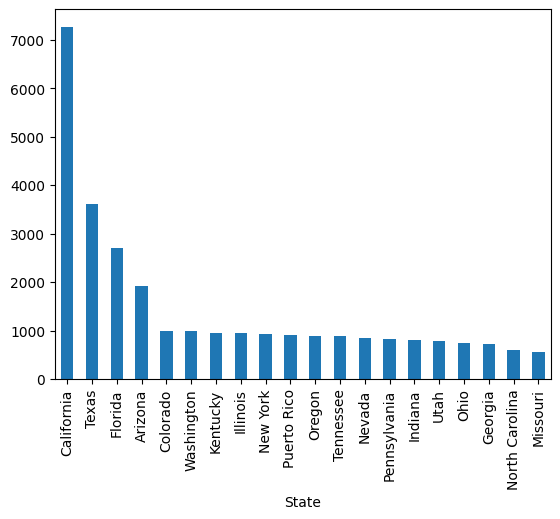

In [89]:
laser_incidents["State"].value_counts()[:20].plot(kind="bar");

## Sorting

In [90]:
# Display 5 incidents with the highest altitude
laser_incidents.sort_values("Altitude", ascending=False).head(5)

Flight ID Aircraft  Altitude Airport Laser Color Injury  \
21173   ROU1628     B763  240000.0     PBI       green  False   
12017    UPS797     A306  125000.0     ABQ       green  False   
27807     LSFD1       EC  100000.0     SJC        blue  False   
21049   ASQ5334     CRJ7  100000.0     RDU       green  False   
27785   ASH6193     CRJ7   98400.0     IND       green  False   

                  City           State           timestamp  
21173  West Palm Beach         Florida 2017-12-04 11:49:00  
12017      Albuquerque      New Mexico 2018-06-30 03:15:00  
27807         San Jose      California 2016-11-13 02:53:00  
21049          Raleigh  North Carolina 2017-12-01 01:32:00  
27785     Indianapolis         Indiana 2016-11-12 23:11:00

In [91]:
# Alternative
laser_incidents.nlargest(5, "Altitude")

Flight ID Aircraft  Altitude Airport Laser Color Injury  \
21173   ROU1628     B763  240000.0     PBI       green  False   
12017    UPS797     A306  125000.0     ABQ       green  False   
21049   ASQ5334     CRJ7  100000.0     RDU       green  False   
27807     LSFD1       EC  100000.0     SJC        blue  False   
27785   ASH6193     CRJ7   98400.0     IND       green  False   

                  City           State           timestamp  
21173  West Palm Beach         Florida 2017-12-04 11:49:00  
12017      Albuquerque      New Mexico 2018-06-30 03:15:00  
21049          Raleigh  North Carolina 2017-12-01 01:32:00  
27807         San Jose      California 2016-11-13 02:53:00  
27785     Indianapolis         Indiana 2016-11-12 23:11:00

**Exercise:** Find the last 3 incidents with blue laser.

## Arithmetics and string manipulation

Standard **arithmetic operators** work on numerical columns too. And so do mathematical functions. Note all such operations are performed in a vector-like fashion.

In [92]:
altitude_meters = laser_incidents["Altitude"] * .3048
altitude_meters.sample(10)

23557    2743.20
3239     1310.64
12955    1219.20
2326     1524.00
23309     914.40
6378     1828.80
18797    1828.80
16242    3352.80
1413     5486.40
21954    1066.80
Name: Altitude, dtype: float64

You may mix columns and scalars, the string arithmetics also works as expected.

In [93]:
laser_incidents["City"] + ", " + laser_incidents["State"]

0          Santa Barbara, California
1                 San Antonio, Texas
2                     Tampa, Florida
3                 Fort Worth , Texas
4                Modesto, California
                    ...             
36458              Las Vegas, Nevada
36459            Lincoln, California
36460    Westhampton Beach, New York
36461                     Guam, Guam
36462                Naples, Florida
Length: 36463, dtype: object

### Summary statistics

The `describe` method shows summary statistics for all the columns:

In [94]:
laser_incidents.describe()

Altitude                      timestamp
count   36218.000000                          33431
mean     7358.314264  2017-08-31 03:32:36.253776384
min         0.000000            2015-01-01 02:00:00
25%      2500.000000            2016-03-25 06:09:30
50%      5000.000000            2017-08-01 04:10:00
75%      9700.000000            2019-01-14 17:07:00
max    240000.000000            2020-08-01 10:49:00
std      7642.686712                            NaN

In [95]:
laser_incidents.describe(include="all")

Flight ID Aircraft       Altitude Airport Laser Color Injury     City  \
count      36451    36411   36218.000000   36450       36461  36445    36460   
unique     24788     1731            NaN    2019          73      2     2254   
top         UNKN     B737            NaN     LAX       green  False  Phoenix   
freq          49     3817            NaN     988       32787  36261     1157   
mean         NaN      NaN    7358.314264     NaN         NaN    NaN      NaN   
min          NaN      NaN       0.000000     NaN         NaN    NaN      NaN   
25%          NaN      NaN    2500.000000     NaN         NaN    NaN      NaN   
50%          NaN      NaN    5000.000000     NaN         NaN    NaN      NaN   
75%          NaN      NaN    9700.000000     NaN         NaN    NaN      NaN   
max          NaN      NaN  240000.000000     NaN         NaN    NaN      NaN   
std          NaN      NaN    7642.686712     NaN         NaN    NaN      NaN   

             State                      timestamp  
count        36457                          33431  
unique          73                            NaN  
top     California                            NaN  
freq          7268                            NaN  
mean           NaN  2017-08-31 03:32:36.253776384  
min            NaN            2015-01-01 02:00:00  
25%            NaN            2016-03-25 06:09:30  
50%            NaN            2017-08-01 04:10:00  
75%            NaN            2019-01-14 17:07:00  
max            NaN            2020-08-01 10:49:00  
std            NaN                            NaN

In [96]:
laser_incidents["Altitude"].mean()

np.float64(7358.314263625822)

In [97]:
laser_incidents["Altitude"].std()

np.float64(7642.6867120945535)

In [98]:
laser_incidents["Altitude"].max()

np.float64(240000.0)

### Basic string operations (Optional)

These are typically accessed using the `.str` "accessor" of the Series like this:
    
- series.str.lower
- series.str.split
- series.str.startswith
- series.str.contains
- ...

See more in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [99]:
laser_incidents[laser_incidents["City"].str.contains("City", na=False)]["City"].unique()

array(['Panama City', 'Oklahoma City', 'Salt Lake City', 'Bullhead City',
       'Garden City', 'Atlantic City', 'Panama City  ', 'New York City',
       'Jefferson City', 'Kansas City', 'Rapid City', 'Tremont City',
       'Boulder City', 'Traverse City', 'Cross City', 'Brigham City',
       'Carson City', 'Midland City', 'Johnson City', 'Ponca City',
       'Panama City Beach', 'Sioux City', 'Bay City', 'Silver City',
       'Pueblo City', 'Iowa City', 'Calvert City', 'Crescent City',
       'Oak City', 'Falls City', 'Salt Lake City ', 'Royse City',
       'Kansas City ', 'Bossier City', 'Baker City', 'Ellwood City',
       'Dodge City', 'Garden City ', 'Union City', 'King City',
       'Kansas City    ', 'Mason City', 'Plant City   ', 'Lanai City',
       'Tell City', 'Yuba City', 'Kansas City  ', 'Salt Lake City    ',
       'Kansas City   ', 'Ocean City', 'Cedar City', 'City of Commerce',
       'Lake City', 'Beach City', 'Alexander City', 'Siler City',
       'Charles City', 'Mal

In [100]:
laser_incidents[laser_incidents["City"].str.contains("City", na=False)]["City"].str.strip().unique()

array(['Panama City', 'Oklahoma City', 'Salt Lake City', 'Bullhead City',
       'Garden City', 'Atlantic City', 'New York City', 'Jefferson City',
       'Kansas City', 'Rapid City', 'Tremont City', 'Boulder City',
       'Traverse City', 'Cross City', 'Brigham City', 'Carson City',
       'Midland City', 'Johnson City', 'Ponca City', 'Panama City Beach',
       'Sioux City', 'Bay City', 'Silver City', 'Pueblo City',
       'Iowa City', 'Calvert City', 'Crescent City', 'Oak City',
       'Falls City', 'Royse City', 'Bossier City', 'Baker City',
       'Ellwood City', 'Dodge City', 'Union City', 'King City',
       'Mason City', 'Plant City', 'Lanai City', 'Tell City', 'Yuba City',
       'Ocean City', 'Cedar City', 'City of Commerce', 'Lake City',
       'Beach City', 'Alexander City', 'Siler City', 'Charles City',
       'Malad City', 'Rush City', 'Webster City'], dtype=object)

## Merging data

It is a common situation where we have two or more datasets with different columns that we need to bring together.
This operation is called *merging* and the Pandas apparatus is to a great detail described in [the documentation](https://pandas.pydata.org/docs/user_guide/merging.html).

In our case, we would like to attach the state populations to the dataset. 


In [101]:
population = pd.read_csv("data/us_state_population.csv")
population

Territory  Population  Population 2010 Code
0                 California  39029342.0         37253956   CA
1                      Texas  30029572.0         25145561   TX
2                    Florida  22244823.0         18801310   FL
3                   New York  19677151.0         19378102   NY
4               Pennsylvania  12972008.0         12702379   PA
5                   Illinois  12582032.0         12830632   IL
6                       Ohio  11756058.0         11536504   OH
7                    Georgia  10912876.0          9687653   GA
8             North Carolina  10698973.0          9535483   NC
9                   Michigan  10034113.0          9883640   MI
10                New Jersey   9261699.0          8791894   NJ
11                  Virginia   8683619.0          8001024   VA
12                Washington   7785786.0          6724540   WA
13                   Arizona   7359197.0          6392017   AZ
14                 Tennessee   7051339.0          6346105   TN
15             Massachusetts   6981974.0          6547629   MA
16                   Indiana   6833037.0          6483802   IN
17                  Missouri   6177957.0          5988927   MO
18                  Maryland   6164660.0          5773552   MD
19                 Wisconsin   5892539.0          5686986   WI
20                  Colorado   5839926.0          5029196   CO
21                 Minnesota   5717184.0          5303925   MN
22            South Carolina   5282634.0          4625364   SC
23                   Alabama   5074296.0          4779736   AL
24                 Louisiana   4590241.0          4533372   LA
25                  Kentucky   4512310.0          4339367   KY
26                    Oregon   4240137.0          3831074   OR
27                  Oklahoma   4019800.0          3751351   OK
28               Connecticut   3626205.0          3574097   CT
29                      Utah   3380800.0          2763885   UT
30               Puerto Rico   3221789.0          3725789   PR
31                      Iowa   3200517.0          3046355   IA
32                    Nevada   3177772.0          2700551   NV
33                  Arkansas   3045637.0          2915918   AR
34               Mississippi   2940057.0          2967297   MS
35                    Kansas   2937150.0          2853118   KS
36                New Mexico   2113344.0          2059179   NM
37                  Nebraska   1967923.0          1826341   NE
38                     Idaho   1939033.0          1567582   ID
39             West Virginia   1775156.0          1852994   WV
40                    Hawaii   1440196.0          1360301   HI
41             New Hampshire   1395231.0          1316470   NH
42                     Maine   1385340.0          1328361   ME
43                   Montana   1122867.0           989415   MT
44              Rhode Island   1093734.0          1052567   RI
45                  Delaware   1018396.0           897934   DE
46              South Dakota    909824.0           814180   SD
47              North Dakota    779261.0           672591   ND
48                    Alaska    733583.0           710231   AK
49      District of Columbia    671803.0           601723   DC
50                   Vermont    647064.0           625741   VT
51                   Wyoming    581381.0           563626   WY
52                      Guam         NaN           159358   GU
53       U.S. Virgin Islands         NaN           106405   VI
54            American Samoa         NaN            55519   AS
55  Northern Mariana Islands         NaN            53883   MP

We will of course use the state name as the merge *key*. Before actually doing the merge, we can explore a bit whether all state names
from the laser incidents dataset are present in our population table.

In [102]:
unknown_states = laser_incidents.loc[~laser_incidents["State"].isin(population["Territory"]), "State"]
print(f"There are {unknown_states.count()} rows with unknown states.")
print(f"Unknown state values are: \n{list(unknown_states.unique())}.")

There are 82 rows with unknown states.
Unknown state values are: 
[nan, 'Virgin Islands', 'Miami', 'North Hampshire', 'Marina Islands', 'Teas', 'Mexico', 'DC', 'VA', 'Northern Marina Islands', 'Mariana Islands', 'Oho', 'Northern Marianas Is', 'UNKN', 'Massachussets', 'FLorida', 'D.C.', 'MIchigan', 'Northern Mariana Is', 'Micronesia'].


We could certainly clean the data by correcting some of the typos. Since the number of the rows with unknown states is not large
(compared to the length of the whole dataset), we will deliberetly not fix the state names.
Instead, we will remove those rows from the merged dataset by using the *inner* type of merge.
All the merge types: *left*, *inner*, *outer* and *right* are well explained by the schema below:

![merge types](pandas-joins.png)

We can use the [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) function to add the `"Population"` values.

In [103]:
laser_incidents_w_population = pd.merge(
    laser_incidents, population, left_on="State", right_on="Territory", how="inner"
)

In [104]:
laser_incidents_w_population

Flight ID             Aircraft  Altitude Airport Laser Color Injury  \
0        N424RP               DA42/A    8500.0     SBA       green  False   
1       AMF1829                 B190   40000.0     SSF       green  False   
2       NKS1881                 A320    2500.0     TPA       green  False   
3       FDX3873                 B763    3000.0     DFW       green  False   
4       SWA3635                 B739   11000.0     MOD       green  False   
...         ...                  ...       ...     ...         ...    ...   
36370    VRD917  A320 (AIRBUS - A-32    8000.0     LAS       green  False   
36371   DAL2371  B738 (BOEING - 737-   11000.0     LHM       green  False   
36372   Unknown              Unknown    2000.0     FOK       green  False   
36373    UAL197                 B737     300.0     GUM       green  False   
36374    EJA336               E55P/L    1000.0     APF       green  False   

                    City       State           timestamp   Territory  \
0          Santa Barbara  California 2020-01-01 01:48:00  California   
1            San Antonio       Texas 2020-01-01 01:55:00       Texas   
2                  Tampa     Florida 2020-01-01 02:14:00     Florida   
3            Fort Worth        Texas 2020-01-01 02:17:00       Texas   
4                Modesto  California 2020-01-01 02:18:00  California   
...                  ...         ...                 ...         ...   
36370          Las Vegas      Nevada 2015-12-31 05:25:00      Nevada   
36371            Lincoln  California 2015-12-31 06:23:00  California   
36372  Westhampton Beach    New York 2015-12-31 11:11:00    New York   
36373               Guam        Guam 2015-12-31 11:47:00        Guam   
36374             Naples     Florida 2015-12-31 23:14:00     Florida   

       Population  Population 2010 Code  
0      39029342.0         37253956   CA  
1      30029572.0         25145561   TX  
2      22244823.0         18801310   FL  
3      30029572.0         25145561   TX  
4      39029342.0         37253956   CA  
...           ...              ...  ...  
36370   3177772.0          2700551   NV  
36371  39029342.0         37253956   CA  
36372  19677151.0         19378102   NY  
36373         NaN           159358   GU  
36374  22244823.0         18801310   FL  

[36375 rows x 13 columns]

In [105]:
laser_incidents_w_population.describe(include="all")

Flight ID Aircraft       Altitude Airport Laser Color Injury     City  \
count      36363    36323   36137.000000   36365       36374  36359    36374   
unique     24735     1726            NaN    2009          73      2     2239   
top         UNKN     B737            NaN     LAX       green  False  Phoenix   
freq          49     3811            NaN     988       32715  36177     1156   
mean         NaN      NaN    7363.934333     NaN         NaN    NaN      NaN   
min          NaN      NaN       0.000000     NaN         NaN    NaN      NaN   
25%          NaN      NaN    2500.000000     NaN         NaN    NaN      NaN   
50%          NaN      NaN    5000.000000     NaN         NaN    NaN      NaN   
75%          NaN      NaN    9800.000000     NaN         NaN    NaN      NaN   
max          NaN      NaN  240000.000000     NaN         NaN    NaN      NaN   
std          NaN      NaN    7645.507063     NaN         NaN    NaN      NaN   

             State                      timestamp   Territory    Population  \
count        36375                          33361       36375  3.634300e+04   
unique          54                            NaN          54           NaN   
top     California                            NaN  California           NaN   
freq          7268                            NaN        7268           NaN   
mean           NaN  2017-08-31 14:04:42.552681472         NaN  1.679960e+07   
min            NaN            2015-01-01 02:00:00         NaN  5.813810e+05   
25%            NaN            2016-03-26 02:47:00         NaN  5.282634e+06   
50%            NaN            2017-08-02 02:40:00         NaN  1.069897e+07   
75%            NaN            2019-01-15 04:00:00         NaN  3.002957e+07   
max            NaN            2020-08-01 10:49:00         NaN  3.902934e+07   
std            NaN                            NaN         NaN  1.378730e+07   

        Population 2010   Code  
count      3.637500e+04  36375  
unique              NaN     54  
top                 NaN     CA  
freq                NaN   7268  
mean       1.542564e+07    NaN  
min        1.064050e+05    NaN  
25%        4.779736e+06    NaN  
50%        9.687653e+06    NaN  
75%        2.514556e+07    NaN  
max        3.725396e+07    NaN  
std        1.287534e+07    NaN

## Grouping & aggregation

A common pattern in data analysis is grouping (or binning) data based on some property and getting some aggredate statistics.

*Example:* Group this workshop participants by nationality a get the cardinality (the size) of each group.

Possibly the simplest group and aggregation is the `value_counts` method, which groups by the respective column value
and yields the number (or normalized frequency) of each unique value in the data.

In [106]:
laser_incidents_w_population["State"].value_counts(normalize=False)

State
California              7268
Texas                   3620
Florida                 2702
Arizona                 1910
Colorado                 988
Washington               982
Kentucky                 952
Illinois                 946
New York                 921
Puerto Rico              912
Oregon                   895
Tennessee                888
Nevada                   837
Pennsylvania             826
Indiana                  812
Utah                     789
Ohio                     750
Georgia                  714
North Carolina           605
Missouri                 547
Minnesota                531
New Jersey               519
Michigan                 505
Hawaii                   500
Alabama                  473
Virginia                 412
Oklahoma                 412
New Mexico               401
Louisiana                351
Massachusetts            346
South Carolina           306
Maryland                 255
Idaho                    237
Arkansas                 237
Wisconsi

This is just a primitive grouping and aggregation operation, we will look into more advanced patterns. 
Let us say we would like to get some numbers (statistics) for individual states.
We can [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) the dataset by the `"State"` column:

In [107]:
grouped_by_state = laser_incidents_w_population.groupby("State")

What did we get? 

In [108]:
grouped_by_state

What is this `DataFrameGroupBy` object? [Its use case is](http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


Let's try a simple aggregate: the mean of altitude for each state:

In [109]:
grouped_by_state["Altitude"].mean().sort_values()

State
Puerto Rico              3552.996703
Hawaii                   4564.536585
Florida                  4970.406773
Alaska                   5209.848485
Wisconsin                5529.951220
New York                 5530.208743
Guam                     5800.000000
Maryland                 6071.739130
District of Columbia     6087.144444
New Jersey               6204.306950
Illinois                 6306.310566
Massachusetts            6473.763848
Texas                    6487.493759
Delaware                 6602.380952
Arizona                  6678.333158
Nevada                   6730.037485
California               6919.705613
Washington               7110.687629
Louisiana                7276.276353
Nebraska                 7277.321429
Michigan                 7330.459082
Oregon                   7411.285231
South Dakota             7419.607843
North Dakota             7455.434783
Ohio                     7482.409880
Pennsylvania             7518.614724
Connecticut              7519.56

What if we were to group by year? We don't have a year column but we can just extract the year from the date and use it for `groupby`.

In [110]:
grouped_by_year = laser_incidents_w_population.groupby(laser_incidents_w_population["timestamp"].dt.year)

You may have noticed how we extracted the year using the [`.dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors).
We will use `.dt` even more below.

Let's calculate the mean altitude of laser incidents per year. Are the lasers getting more powerful? 🤔

In [111]:
mean_altitude_per_year = grouped_by_year["Altitude"].mean().sort_index()
mean_altitude_per_year

timestamp
2015.0    6564.621830
2016.0    7063.288912
2017.0    7420.971064
2018.0    7602.049323
2019.0    8242.586268
2020.0    8618.242465
Name: Altitude, dtype: float64

We can also quickly plot the results, more on plotting in the next lessons.

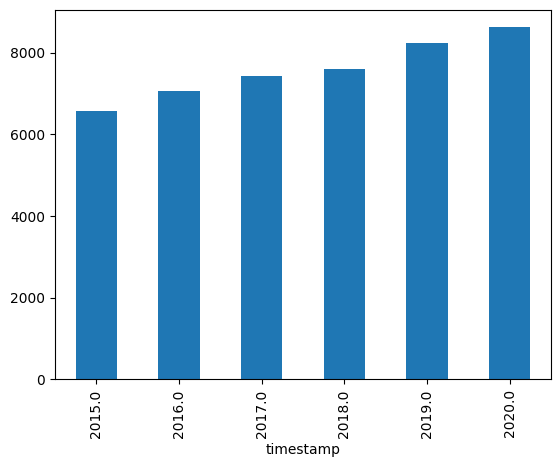

In [112]:
mean_altitude_per_year.plot(kind="bar");

**Exercise:** Calculate the `sum` of injuries per year. Use the fact that `True + True = 2` ;)

We can also create a new `Series` if the corresponding column does not exist in the dataframe and group it by another `Series`
(which in this case is a column from the dataframe). Important is that the grouped and the by series have the same index.

In [113]:
# how many incidents per million inhabitants are there for each state?
incidents_per_million = (1_000_000 / laser_incidents_w_population["Population"]).groupby(laser_incidents_w_population["State"]).sum()
incidents_per_million.sort_values(ascending=False)

State
Hawaii                  347.174968
Puerto Rico             283.072541
District of Columbia    272.401284
Nevada                  263.392087
Arizona                 259.539186
Utah                    233.376716
Oregon                  211.078085
Kentucky                210.978412
New Mexico              189.746676
California              186.218871
Colorado                169.180226
Washington              126.127279
Tennessee               125.933528
Idaho                   122.225872
Florida                 121.466464
Texas                   120.547839
Montana                 119.337375
Indiana                 118.834422
North Dakota            118.060573
Oklahoma                102.492661
Alabama                  93.214901
Minnesota                92.877892
Alaska                   91.332542
Missouri                 88.540597
Arkansas                 77.816234
Louisiana                76.466573
Illinois                 75.186584
Rhode Island             74.058226
Georgia       

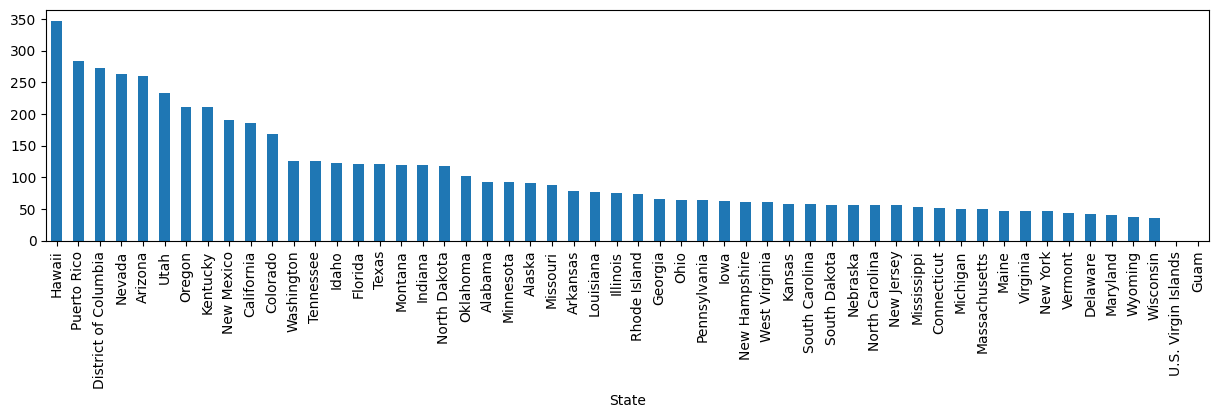

In [114]:
incidents_per_million.sort_values(ascending=False).plot(kind="bar", figsize=(15, 3));

## Time series operations (Optional)

We will briefly look at some more specific operation for time series data (data with a natural time axis).
Typical operations for time series are resampling or rolling window transformations such as filtering.
Note that Pandas is not a general digital signal processing library - there are other (more capable) tools for this purpose.

First, we set the index to `"timestamp"` to make our dataframe inherently time indexed. This will make doing further time operations easier.

In [115]:
incidents_w_time_index = laser_incidents.set_index("timestamp")
incidents_w_time_index

Flight ID             Aircraft  Altitude Airport  \
timestamp                                                              
2020-01-01 01:48:00    N424RP               DA42/A    8500.0     SBA   
2020-01-01 01:55:00   AMF1829                 B190   40000.0     SSF   
2020-01-01 02:14:00   NKS1881                 A320    2500.0     TPA   
2020-01-01 02:17:00   FDX3873                 B763    3000.0     DFW   
2020-01-01 02:18:00   SWA3635                 B739   11000.0     MOD   
...                       ...                  ...       ...     ...   
2015-12-31 05:25:00    VRD917  A320 (AIRBUS - A-32    8000.0     LAS   
2015-12-31 06:23:00   DAL2371  B738 (BOEING - 737-   11000.0     LHM   
2015-12-31 11:11:00   Unknown              Unknown    2000.0     FOK   
2015-12-31 11:47:00    UAL197                 B737     300.0     GUM   
2015-12-31 23:14:00    EJA336               E55P/L    1000.0     APF   

                    Laser Color Injury               City       State  
timestamp                                                              
2020-01-01 01:48:00       green  False      Santa Barbara  California  
2020-01-01 01:55:00       green  False        San Antonio       Texas  
2020-01-01 02:14:00       green  False              Tampa     Florida  
2020-01-01 02:17:00       green  False        Fort Worth        Texas  
2020-01-01 02:18:00       green  False            Modesto  California  
...                         ...    ...                ...         ...  
2015-12-31 05:25:00       green  False          Las Vegas      Nevada  
2015-12-31 06:23:00       green  False            Lincoln  California  
2015-12-31 11:11:00       green  False  Westhampton Beach    New York  
2015-12-31 11:47:00       green  False               Guam        Guam  
2015-12-31 23:14:00       green  False             Naples     Florida  

[36463 rows x 8 columns]

First, turn the data into a time series of incidents per hour. This can be done by resampling to 1 hour and using 
`count` (basically on any column or on any column that has any non-NA value) to count the number of incidents.

In [116]:
incidents_hourly = incidents_w_time_index.notna().any(axis="columns").resample("1H").count().rename("incidents per hour")
incidents_hourly

/var/folders/dm/gbbql3p121z0tr22r2z98vy00000gn/T/ipykernel_95281/3245646514.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  incidents_hourly = incidents_w_time_index.notna().any(axis="columns").resample("1H").count().rename("incidents per hour")


timestamp
2015-01-01 02:00:00    1
2015-01-01 03:00:00    2
2015-01-01 04:00:00    1
2015-01-01 05:00:00    3
2015-01-01 06:00:00    0
                      ..
2020-08-01 06:00:00    0
2020-08-01 07:00:00    1
2020-08-01 08:00:00    1
2020-08-01 09:00:00    0
2020-08-01 10:00:00    3
Name: incidents per hour, Length: 48945, dtype: int64

Looking at those data gives us a bit too detailed information.

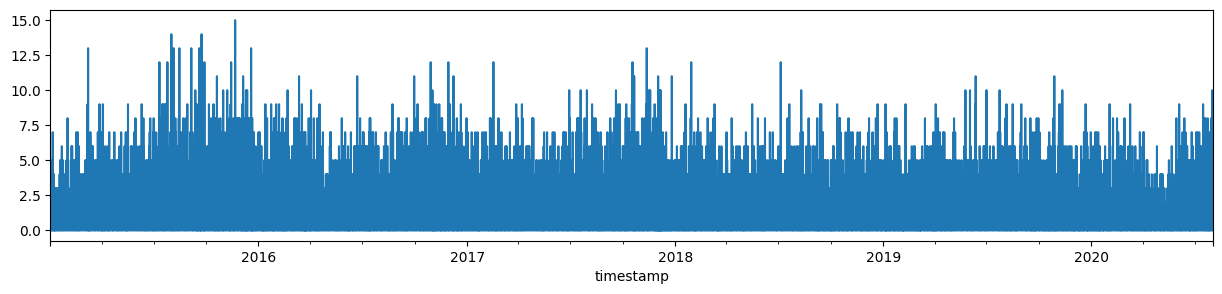

In [117]:
incidents_hourly.sort_index().plot(kind="line", figsize=(15, 3));

A daily mean, the result of resampling to 1 day periods and calculating the mean, is already something more digestible. 
Though still a bit noisy.

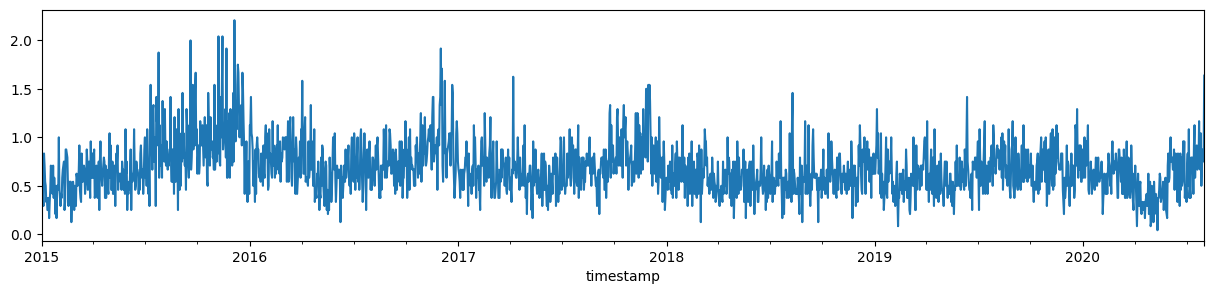

In [118]:
incidents_daily = incidents_hourly.resample("1D").mean()
incidents_daily.plot.line(figsize=(15, 3));

We can look at filtered data by rolling mean with, e.g., 28 days window size.

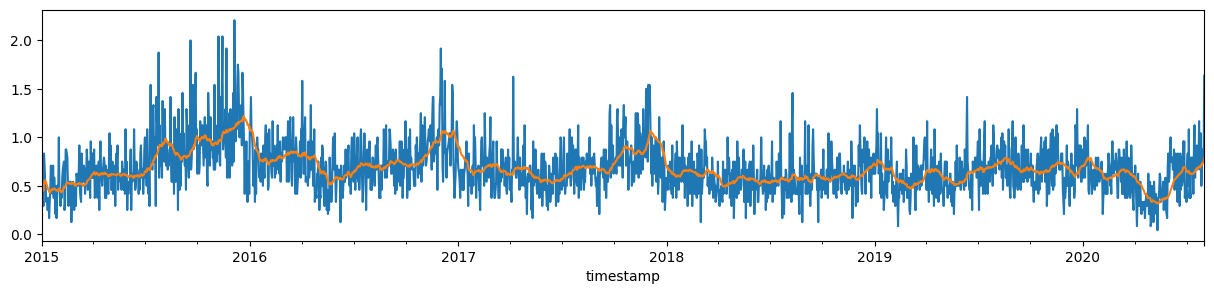

In [119]:
incidents_daily_filtered = incidents_daily.rolling("28D").mean()
incidents_daily.plot.line(figsize=(15, 3));
incidents_daily_filtered.plot.line(figsize=(15, 3));